## scikit-Learn Examples

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn import svm, metrics
%matplotlib inline 

# Linear Support Vector Classification

We will use sklearn's Linear SVC and the digit dataset to measure accuracy against number of samples.

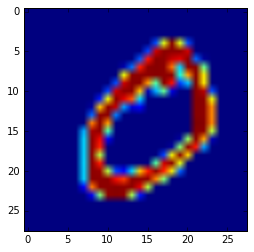

In [2]:
# We use scipy to load the data from the train.mat file, this is tipically a matlab file.
data = scipy.io.loadmat("data/digit-dataset/train.mat")

# If we plot the images they will show up sideways.
# We need to perform some transformations to change this.
# This is just for visualization purposes
images = data['train_images']
images = np.transpose(images.T, (0,2,1))
plt.figure()
plt.imshow(images[0])

In [3]:
# Now we convert the images into feature arrays.
# Each pixel in the image corresponds to one feature
# We also extract the training labels from the data we loaded.
# We pair labels ot their corresponding image and shuffle our
# training dataset since our original digit dataset is ordered

images = np.reshape(images, (60000, 784))
labels = data['train_labels']
pairs = []
for image, label in zip(images, labels):
    pairs.append((image, label[0]))
np.random.shuffle(pairs)
imageList = []
labelList = []
for image, label in pairs:
    imageList.append(image)
    labelList.append(label)

In [4]:
# We take the last 10,000 pairs to be our validation set
validImages = imageList[-10000:]
validLabels = labelList[-10000:]

In [7]:
# We now take our LinearSVC and run it multiple
# times using a different number of samples each time.
clf = svm.LinearSVC()
numSamples = [100, 200, 500, 1000, 2000, 5000, 10000]
start = 0
errorRates = []
for i in numSamples:
    trainImages = imageList[start:i]
    trainLabels = labelList[start:i]
    clf.fit(trainImages, trainLabels)
    errorRates.append(clf.score(validImages, validLabels))
    start = i

Notice that for each time we ran our classification algorithm, we used different parts of our training dataset. There are different ways of drawing our samples from the training set, some better than others. For example we could have drawn random samples from the entire training dataset. 

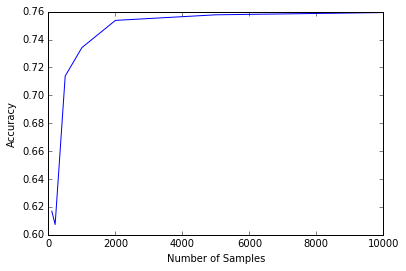

In [9]:
# Now we will plot our accuracy for each of the different
# number of samples.

plt.figure()
plt.plot(numSamples, errorRates, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples')

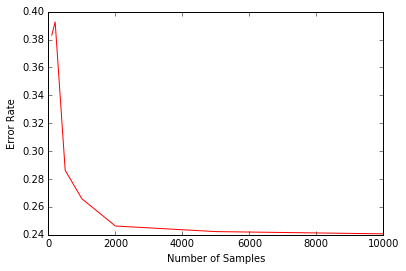

In [10]:
# And same for the error rates
errorRates = [1 - x for x in errorRates]
plt.figure()
plt.plot(numSamples, errorRates, 'r')
plt.ylabel('Error Rate')
plt.xlabel('Number of Samples')

Notice there is a huge increase in accuracy between 0 and 2000 samples, but it pretty much flattens out after that. This is particularly important for larger datasets, where compute time can be drastically decreased by decreasing the number of samples we work with, without affecting the accuracy of our algorithm.  

# Confusion Matrix

A confusion matrix is a handy table that helps visualize the accuracy of a classification algorithm. 

In [11]:
# We use our LinearSVC classifier with a sample of the dataset
confMatrix = metrics.confusion_matrix(validLabels, clf.predict(validImages))
print confMatrix

[[ 886    1   22   13    4   28   11   10   26    1]
 [   2 1017   21    6   14   13    5   12   26    9]
 [  24   33  729   48   15   15   32   22   57    4]
 [  19   12   87  684    6   79   14   39  108   29]
 [   8    9   21    5  818   17   26   16   51   56]
 [  32   22   30   67   14  593   25   15   85   17]
 [  19   12   37    7   19   41  805    3   34    2]
 [   7   10   34   14   23   12    5  822   22   42]
 [  28   53   53   28   11   84   13   18  660   15]
 [  18    5   13   17   75   29    2  126   93  579]]


We will use a neat visualization example from the scikit documentation to better understand the output array

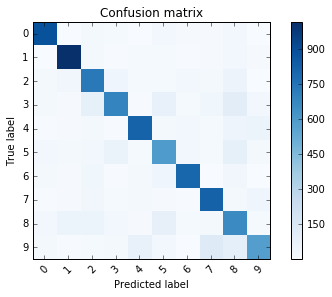

In [12]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks, rotation=45)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(confMatrix)

From this confusion matrix plot we can see that for the most part our algorithm makes a good prediction. The shades in the plot tell us which numbers are more likely to be misclassified. 

# Spam classification 

Now we will use our LinearSVC to classify email and we will learn about algorithm parameters.

In [14]:
spamData = scipy.io.loadmat("data/spam-dataset/spam_data.mat")
print spamData.keys()

In [15]:
featureVectors = spamData['training_data']
labels = spamData['training_labels'][0]

In [16]:
# Dataset length
print len(labels)

5172


In [18]:
pairs = []
for vector, label in zip(featureVectors, labels):
    pairs.append((vector, label))
np.random.shuffle(pairs)
vectorList = []
labelList = []
for vector, label in pairs:
    vectorList.append(vector)
    labelList.append(label)

In [19]:
# We take 172 pairs as our validation set
validFeatures = vectorList[5000:]
validLabels = labelList[5000:]

In [20]:
avgAccuracies = []
regParams = [1000000, 10000, 1000, 100, 10, 1]
for parameter in regParams:
    clf = svm.LinearSVC(C=parameter)
    avg = 0
    for _ in range(10):
        smallvalidFeatures = vectorList[(_ * 517):(_ + 1)*517]
        smallvalidLabels = labelList[(_ * 517):(_ + 1)*517]
        trainVectors = vectorList[:_*517] + vectorList[(_ + 1)*517 :]
        trainLabel = labelList[:_*517] + labelList[(_ + 1)*517 :]
        clf.fit(trainVectors, trainLabel)
        avg += clf.score(smallvalidFeatures, smallvalidLabels) / 10.0
    avgAccuracies.append(avg)

Here we keep the number of samples constant but use different values for the C parameter (see scikit-learn documentation for explanation of C error term). In many machine learning algorithms we will encounter these parameters, and we will have to tune them to find a value that gives better performance. We will look at overfitting in future examples. 

Notice also the way we partition the samples for each iteration. This is yet anothr way of sampling data, and in later examples we will look at cross-validation, which is a good way to avoid overfitting a dataset. 

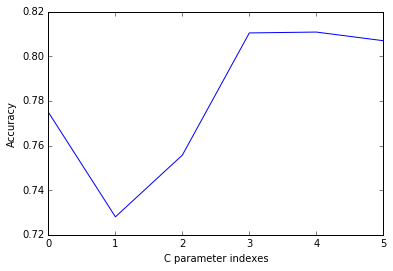

In [27]:
plt.plot( avgAccuracies)
plt.ylabel('Accuracy')
plt.xlabel('C parameter indexes')

The best value for C for the spam-data is C = 100

In [38]:
clf = svm.LinearSVC(C=100)
numSamples = [100, 200, 500, 1000, 2000, 5000]
start = 0
errorRates = []
for i in numSamples:
    trainVectors = vectorList[start:i]
    trainLabels = labelList[start:i]
    clf.fit(trainVectors, trainLabels)
    errorRates.append(clf.score(validFeatures, validLabels))
    start = i

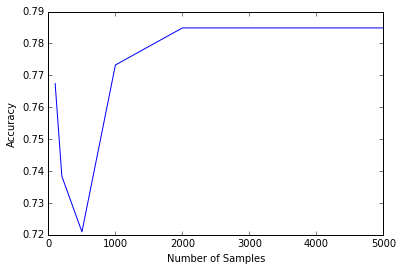

In [39]:
plt.figure()
plt.plot(numSamples, errorRates, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples')

And we see that a good number of samples corresponding to C=100 is 2000 samples.